# CNN for CIFAR_10 Data

<img src="https://miro.medium.com/v2/0*BdetXYemwXwOqNTs.jpg">

CIFAR-10 Veri Kümesi, önerdiği gibi 10 farklı kategoride görüntüye sahiptir
.{uçak, otomobil, kuş, kedi, geyik, köpek, kurbağa, at, gemi, kamyon} olarak adlandırılan 10 farklı sınıftan toplam 60000 görüntü vardır. Tüm görüntüler 32x32 boyutundadır. Toplamda 50000 eğitim görüntüsü ve 10000 test görüntüsü vardır.

Bu projemizde CNN kullanrak bir resim sınıflandırma modeli oluşturacağız

In [1]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
x_train=x_train/255
x_test=x_test/255

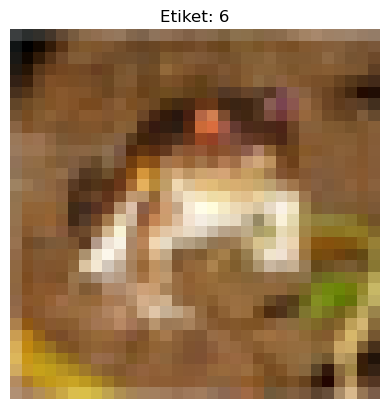

In [25]:
import matplotlib.pyplot as plt

# Bir görüntüyü görselleştirme
plt.imshow(x_train[0])  # İlk eğitim görüntüsünü göster
plt.title(f"Etiket: {y_train[0][0]}")
plt.axis('off')  # Eksenleri gizle
plt.show()

### Model

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [18]:
model=Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) # Burada 'rate' parametresini belirtiyoruz
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Dense(196))
model.add(Dense(144))
model.add(Dense(128))
model.add(Dense(96))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(10, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=150,verbose=1)

Epoch 1/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.4007 - loss: 1.8116 - val_accuracy: 0.5074 - val_loss: 1.3600
Epoch 2/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5564 - loss: 1.2581 - val_accuracy: 0.5950 - val_loss: 1.1806
Epoch 3/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5894 - loss: 1.1617 - val_accuracy: 0.5212 - val_loss: 1.4039
Epoch 4/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6191 - loss: 1.1020 - val_accuracy: 0.5745 - val_loss: 1.2202
Epoch 5/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6317 - loss: 1.0527 - val_accuracy: 0.5798 - val_loss: 1.2419
Epoch 6/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6463 - loss: 1.0149 - val_accuracy: 0.5871 - val_loss: 1.1543
Epoch 7/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6567 - loss: 0.9841 - val_accuracy: 0.6783 - val_loss: 0.9248
Epoch 8/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6658 

In [65]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 2304)                │           9,216 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 196)                 │          50,372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 144)                 │          28,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          18,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 96)                  │          12,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,202,524 (8.40 MB)

 Trainable params: 732,574 (2.79 MB)

 Non-trainable params: 4,800 (18.75 KB)

 Optimizer params: 1,465,150 (5.59 MB)

### Tahmin

In [48]:
import numpy as np

In [68]:
image1=x_test[16]

In [69]:
class_names={ 
                0:"ucak", 1:"otomobil", 2:"kuş", 3:"kedi", 4:"geyik", 5:"köpek", 6:"kurbağa", 7:"at", 8:"gemi", 9:"kamyon"
            }

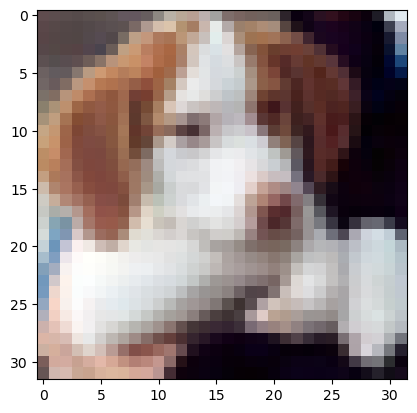

In [70]:
plt.imshow(image1)
plt.show()

In [71]:
image1 = image1.reshape(1, 32, 32, 3) 

In [72]:
prediction=model.predict(image1)
predicted_class=np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [73]:
predicted_class

5

In [74]:
class_names[predicted_class]

'köpek'

In [75]:
image2=x_test[119]

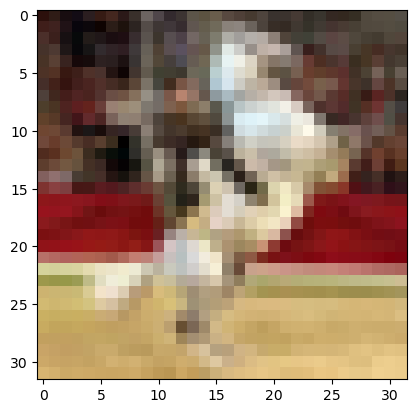

In [76]:
plt.imshow(image2)
plt.show()

In [77]:
image2 = image2.reshape(1, 32, 32, 3) 

In [78]:
prediction=model.predict(image2)
predicted_class=np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [79]:
predicted_class

7

In [80]:
class_names[predicted_class]

'at'

In [81]:
model.save("cifar_10.h5")

Sonuc olarak modelimizden 76% accuracy aldık ve bir streamlit uygulaması oluşturduk